**Installing Dwave Package**

In [4]:
!pip install dwave-ocean-sdk

# **Making QUBO TERMS in DICT form**

In [75]:
import numpy as np # for mathematical things
from dwave.system import DWaveSampler, EmbeddingComposite # to use Dwave just like before
from dimod import BinaryQuadraticModel # for the implementation of the by Quantum Annealer
# the function generates the hamiltonian qubo terms based on what discussed in the pdf that has been sent
def get_hamiltonian_terms(N, edges, A, B, C):
    Q = {}

    # H_A terms
    for i in range(2, N + 1):
        Q[(f'y_{i}', f'y_{i}')] = A * (i**2 -1)
        for j in range(i + 1, N + 1):
            Q[(f'y_{i}', f'y_{j}')] = 2 * A * (1 + i * j)

    for v in range(N):
        Q[(f'x_{v}', f'x_{v}')] = A
        for u in range(v+1,N):
          Q[(f'x_{v}', f'x_{u}')] =  2 * A
        for i in range(2, N + 1):
            Q[(f'y_{i}', f'x_{v}')] = - A * i

    # H_B terms
    for u, v in edges:
        Q[(f'x_{u}', f'x_{v}')] = - 2 * B
    for i in range(2, N + 1):
        Q[(f'y_{i}', f'y_{i}')] += B * (i**2 -i)/2
        for j in range(i + 1, N + 1):
            Q[(f'y_{i}', f'y_{j}')] += B * (i * j)

    # H_C terms
    for v in range(N):
        Q[(f'x_{v}', f'x_{v}')] -= C

    return Q

In [8]:
#Using Dwave Quantum Computer to solve the QUBO problem
token = 'DEV-abdc4c7339474eacea7a99b9e4269e22f667d3f2'
solver = 'Advantage_system6.4'

In [9]:
from dimod import BinaryQuadraticModel
from dwave.system import EmbeddingComposite, DWaveSampler

# **Function to Sample the Cliques**

In [77]:
def find_largest_clique(graph, A, B, C):
    N = len(graph)
    edges = [(i, j) for i in range(N) for j in range(i + 1, N) if graph[i][j] == 1]

    # Get the QUBO terms
    Q = get_hamiltonian_terms(N, edges, A, B, C)
    print(Q)
    # Create a binary quadratic model
    bqm = BinaryQuadraticModel.from_qubo(Q)
    print(bqm)
    # Use D-Wave's quantum annealer
    sampler = EmbeddingComposite(DWaveSampler(token= token, solver = solver))
    sampleset = sampler.sample(bqm, num_reads=100)
    # print(sampleset)

    # Extract the best solution
    best_sample = sampleset.first.sample
    print(best_sample)
    largest_clique = [int(key.split('_')[1]) for key, value in best_sample.items() if key.startswith('x') and value == 1]

    return largest_clique, best_sample

# Implementaition on a example

In [78]:

# Example graph (adjacency matrix)
graph = [
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 1, 0]
]

# Constants
A = 18
B = 2
C = 2

# Find the largest clique
largest_clique, best_sample = find_largest_clique(graph, A, B, C)
print("Largest Clique:", largest_clique)
print("Sample:", best_sample)

{('y_2', 'y_2'): 56.0, ('y_2', 'y_3'): 264, ('y_2', 'y_4'): 340, ('y_2', 'y_5'): 416, ('y_3', 'y_3'): 150.0, ('y_3', 'y_4'): 492, ('y_3', 'y_5'): 606, ('y_4', 'y_4'): 282.0, ('y_4', 'y_5'): 796, ('y_5', 'y_5'): 452.0, ('x_0', 'x_0'): 16, ('x_0', 'x_1'): -4, ('x_0', 'x_2'): -4, ('x_0', 'x_3'): 36, ('x_0', 'x_4'): 36, ('y_2', 'x_0'): -36, ('y_3', 'x_0'): -54, ('y_4', 'x_0'): -72, ('y_5', 'x_0'): -90, ('x_1', 'x_1'): 16, ('x_1', 'x_2'): -4, ('x_1', 'x_3'): -4, ('x_1', 'x_4'): 36, ('y_2', 'x_1'): -36, ('y_3', 'x_1'): -54, ('y_4', 'x_1'): -72, ('y_5', 'x_1'): -90, ('x_2', 'x_2'): 16, ('x_2', 'x_3'): -4, ('x_2', 'x_4'): -4, ('y_2', 'x_2'): -36, ('y_3', 'x_2'): -54, ('y_4', 'x_2'): -72, ('y_5', 'x_2'): -90, ('x_3', 'x_3'): 16, ('x_3', 'x_4'): -4, ('y_2', 'x_3'): -36, ('y_3', 'x_3'): -54, ('y_4', 'x_3'): -72, ('y_5', 'x_3'): -90, ('x_4', 'x_4'): 16, ('y_2', 'x_4'): -36, ('y_3', 'x_4'): -54, ('y_4', 'x_4'): -72, ('y_5', 'x_4'): -90}
BinaryQuadraticModel({'y_2': 56.0, 'y_3': 150.0, 'y_4': 282.0,

In [80]:
import networkx as nx # for making graphs
import matplotlib.pyplot as plt # for ploting

# **A Function To Plot**

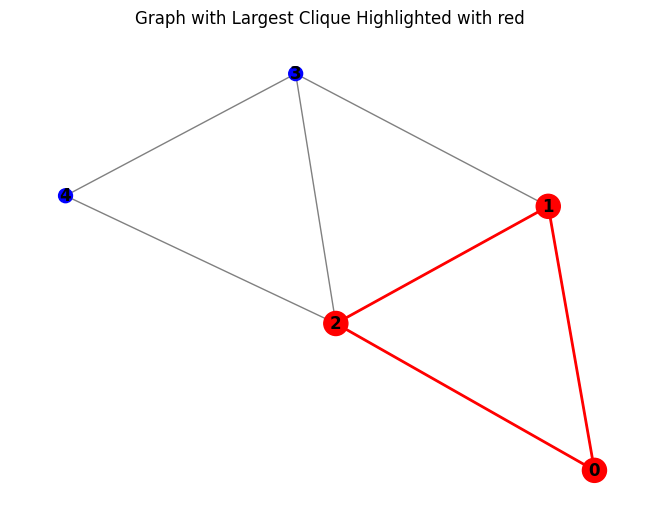

In [82]:
def plot_graph_with_clique(graph, largest_clique):
    G = nx.Graph()
    N = len(graph)

    # Add nodes
    for i in range(N):
        G.add_node(i)

    # Add edges
    for i in range(N):
        for j in range(i + 1, N):
            if graph[i][j] == 1:
                G.add_edge(i, j)

    # Set colors: red for clique nodes, blue for others
    node_colors = ['red' if node in largest_clique else 'blue' for node in G.nodes()]

    # Set sizes: larger size for clique nodes
    node_sizes = [300 if node in largest_clique else 100 for node in G.nodes()]

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray', font_weight='bold')

    # Highlight the largest clique with a different color for edges
    clique_edges = [(i, j) for i in largest_clique for j in largest_clique if i < j and graph[i][j] == 1]
    nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='red', width=2)

    plt.title("Graph with Largest Clique Highlighted with red")
    plt.show()

# Plot the graph with the largest clique highlighted
plot_graph_with_clique(graph, largest_clique)
